In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data=pd.read_csv("/temp/dataset.csv/dataset.csv")

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [19]:
data.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [20]:
data_clean = data.drop_duplicates(subset="track_id", keep='first', inplace=False)

In [21]:
data_drop = data_clean.drop(['track_id', 'Unnamed: 0','time_signature', 'key'], axis=1)

data_drop.head(10)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,acoustic
5,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,acoustic
6,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,acoustic
7,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,acoustic
8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,acoustic
9,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,acoustic


In [22]:
data_p = data_drop.sort_values("popularity", ascending=False)

data_p.head(10)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
20001,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,dance
51664,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,hip-hop
67356,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,latin
20008,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,dance
67358,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Me Porto Bonito,97,178567,True,0.911,0.712,-5.105,0,0.0817,0.09010,0.000027,0.0933,0.425,92.005,latin
67359,Bad Bunny,Un Verano Sin Ti,Tití Me Preguntó,97,243716,False,0.650,0.715,-5.198,0,0.2530,0.09930,0.000291,0.1260,0.187,106.672,latin
67559,Bad Bunny,Un Verano Sin Ti,Efecto,96,213061,False,0.801,0.475,-8.797,0,0.0516,0.14100,0.000017,0.0639,0.234,98.047,latin
79000,OneRepublic,I Ain’t Worried (Music From The Motion Picture...,I Ain't Worried,96,148485,False,0.704,0.797,-5.927,1,0.0475,0.08260,0.000745,0.0546,0.825,139.994,piano
20000,Chris Brown,Indigo (Extended),Under The Influence,96,184613,True,0.733,0.690,-5.529,0,0.0427,0.06350,0.000001,0.1050,0.310,116.992,dance
67500,Bad Bunny;Bomba Estéreo,Un Verano Sin Ti,Ojitos Lindos,95,258298,False,0.647,0.686,-5.745,0,0.0413,0.08000,0.000001,0.5280,0.268,79.928,latin


In [23]:
#Parametry statystytczne: średnia, mediana, odchylenie...
#Shape of the dataset
rows, columns = data_p.shape
size = data_p.size
print(f'Dataset shape is {rows} rows x {columns} columns - {size} elements in total')

Dataset shape is 89741 rows x 17 columns - 1525597 elements in total


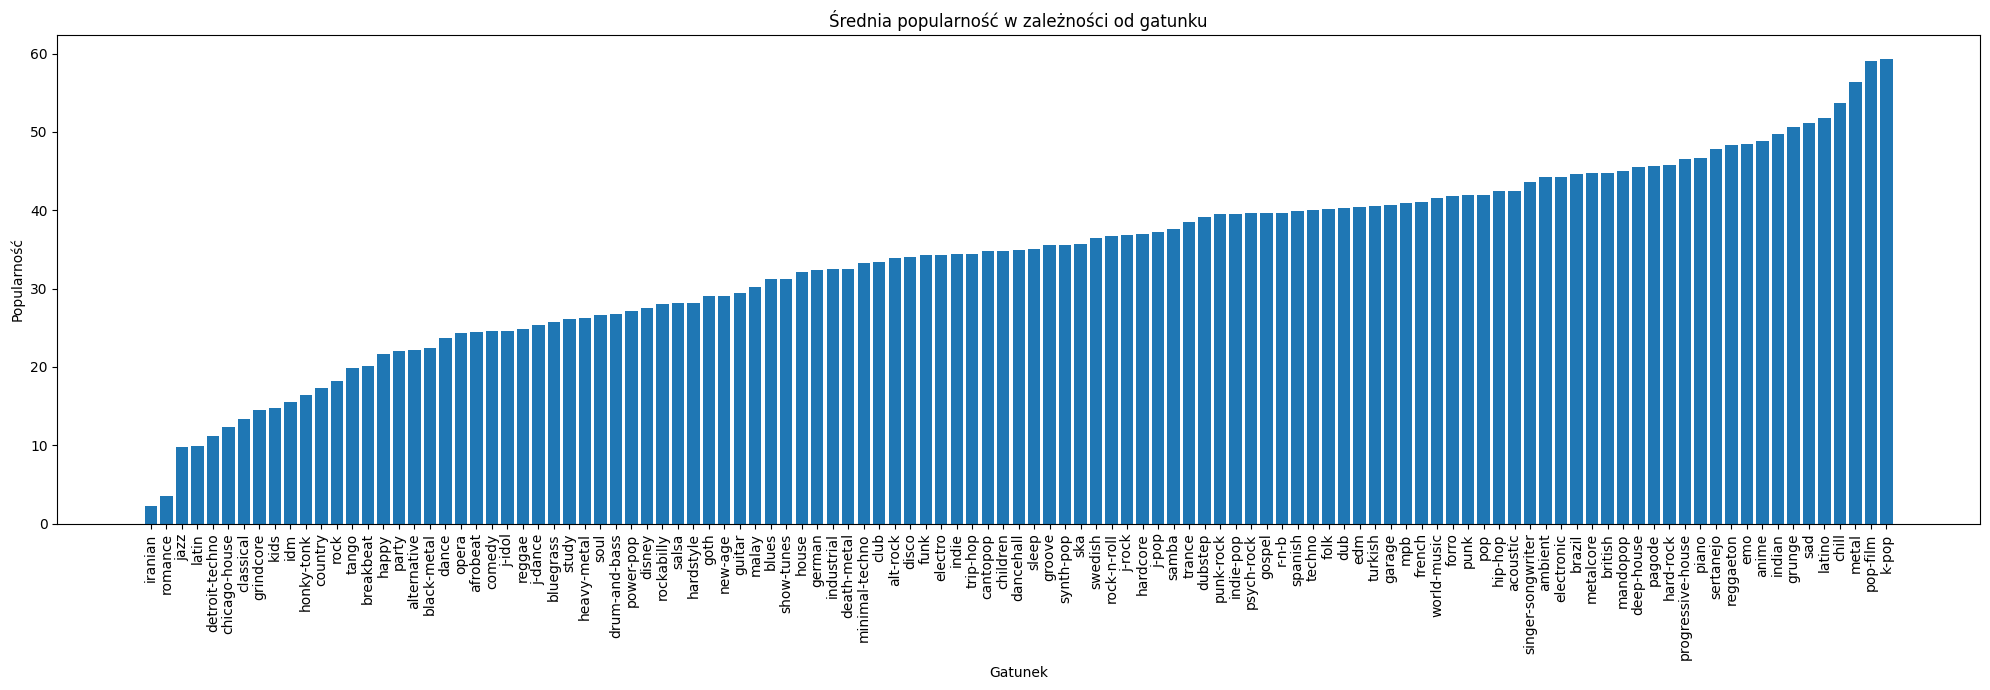

In [24]:
#Wykres popularności względem gatunku

df = pd.DataFrame(data_p)

# Grupowanie danych po gatunku i obliczanie średniej popularności
genre_popularity = df.groupby('track_genre')['popularity'].mean()

# Sortowanie danych popularności
sorted_genre_popularity = genre_popularity.sort_values()

# Tworzenie wykresu
plt.figure(figsize=(20, 7))
plt.bar(sorted_genre_popularity.index, sorted_genre_popularity.values)
plt.xlabel('Gatunek')
plt.ylabel('Popularność')
plt.title('Średnia popularność w zależności od gatunku')
plt.xticks(rotation=90)
plt.tight_layout()

# Wyświetlanie wykresu
plt.show()

In [ ]:
#Wykres popularności w zależności od statystyk (przeskalowanie, podział cech na grupy)



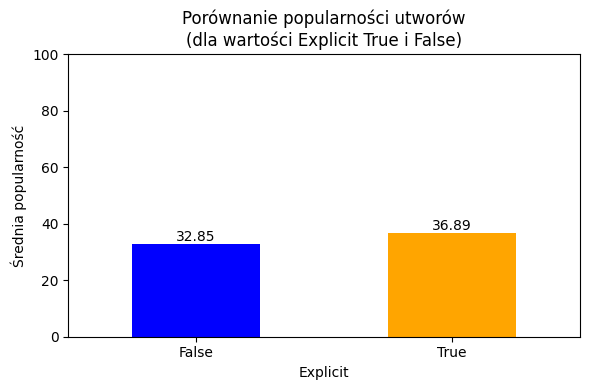

In [25]:
#W zależności od wartości explicit
df = pd.DataFrame(data_p)

# Grupowanie danych po wartości explicit i obliczanie średniej popularności
explicit_popularity = df.groupby('explicit')['popularity'].mean()

# Tworzenie wykresu
plt.figure(figsize=(6, 4))
colors = ['blue', 'orange']  # Kolory dla False i True
explicit_popularity.plot(kind='bar', color=colors)
plt.xlabel('Explicit')
plt.ylabel('Średnia popularność')
plt.title('Porównanie popularności utworów\n(dla wartości Explicit True i False)')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.ylim(0, 100)  # Ustalenie zakresu osi Y
plt.tight_layout()

# Dodanie etykiet do słupków
for i, value in enumerate(explicit_popularity):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Wyświetlanie wykresu
plt.show()

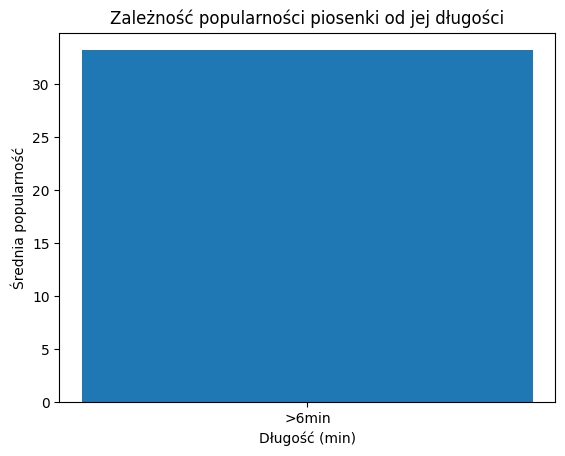

In [30]:
#Wykres popularności od długości piosenki


df = pd.DataFrame(data_p)

# Przetwarzanie danych dla przedziałów czasowych
df['duration_sec'] = df['duration_ms'] / 1000
df['duration_group'] = pd.cut(df['duration_sec'], bins=[0, 6, np.inf], labels=['0-10 sec', '>6min'])

# Obliczanie średniej popularności dla każdego przedziału
grouped_df = df.groupby('duration_group')['popularity'].mean().reset_index()

# Tworzenie wykresu kolumnowego
plt.bar(grouped_df['duration_group'], grouped_df['popularity'])
plt.xlabel('Długość (min)')
plt.ylabel('Średnia popularność')
plt.title('Zależność popularności piosenki od jej długości')

plt.show()

In [29]:
df = pd.DataFrame(data_p)
df['duration_sec'] = df['duration_ms'] / 1000
long_df = df.query('duration_sec>360')
long_df['popularity'].mean()

27.711714460036607

In [ ]:
#7.Trenowanie modelu: Przewidywanie popularności piosenki(idealne parametry) sckit-learn
#8.Zastosowanie alternatywnych klasyfikatorów i parametrów (fine tuning)

In [ ]:
#Statystyki najpopularniejszych artystów(pogrupować piosenki wg artystów, wyciągnąć uśrednione statystki piosenek, porównanie do najpopularniejszej wg artysty)

In [ ]:
#Analiza rozkładu danych: histogram, wykresy gęstości, skośność i kurtoza

In [ ]:
#Podsumowanie statystyczne:

#Statystyki opisowe dla każdej zmiennej
#Liczba unikalnych wartości w kolumnach
#Procentowy udział kategorii w kolumnach kategorycznych


In [ ]:
#Macierz korelacji:

#Obliczenie macierzy korelacji między zmiennymi
#Wygenerowanie wykresu korelacji (np. heatmapy)

In [ ]:
#Normalizacja tekstu: najpopularniejsze słowa z tytłów piosenek

In [ ]:
#Wektoryzacja tesktu do wygenerowania idealnego tytułu